# Classififcation-DecisionTrees

In [334]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
import matplotlib.pyplot as plt
%matplotlib inline

In [335]:
df = pd.read_csv('drug200.csv')

In [336]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [337]:
df.shape

(200, 6)

In [338]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [340]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [341]:
df.isna().sum().sum()

0

In [342]:
df.isnull().sum().sum()

0

In [343]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [344]:
y = df['Drug'].values
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [345]:
type(X)

numpy.ndarray

In [346]:
type(y)

numpy.ndarray

In [347]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [348]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])

LabelEncoder()

In [349]:
X[:,1] = le_sex.transform(X[:,1])
X[:,1]

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0], dtype=object)

In [350]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [351]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['HIGH', 'LOW', 'NORMAL'])

LabelEncoder()

In [352]:
X[:,2] = le_BP.transform(X[:,2])
X[:,2]

array([0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2,
       2, 1], dtype=object)

In [353]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [354]:
le_chol = preprocessing.LabelEncoder()
le_chol.fit(['HIGH', 'NORMAL'])

LabelEncoder()

In [355]:
X[:,3] = le_chol.transform(X[:,3])
X[:,3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1], dtype=object)

In [356]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [357]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [358]:
print("Trainset Size: ",X_train.shape,y_train.shape)
print("Testset Size: ",X_test.shape,y_test.shape)

Trainset Size:  (140, 5) (140,)
Testset Size:  (60, 5) (60,)


In [359]:
drugTree = DecisionTreeClassifier(criterion='entropy',max_depth=4) # criterion = gini, log_loss
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [360]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [361]:
Yhat = drugTree.predict(X_test)

In [362]:
Yhat[0:10]

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX'], dtype=object)

In [363]:
y_test[0:10]

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX'], dtype=object)

In [364]:
print('Decision Tree Accuracy:',metrics.accuracy_score(y_test,Yhat))

Decision Tree Accuracy: 1.0


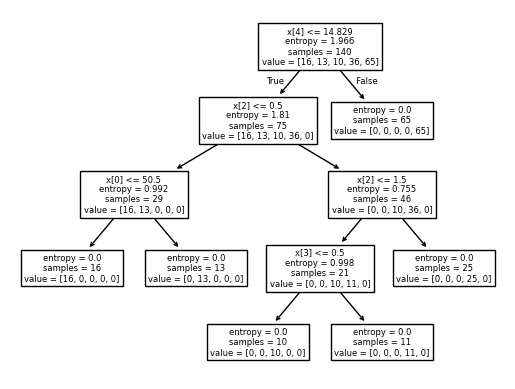

In [365]:
tree.plot_tree(drugTree)
plt.show()

In [399]:
report = metrics.classification_report(y_test,Yhat)
print(report)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

